```
    _/    _/  _/_/_/  _/       Numerical Simulation Laboratory
   _/_/  _/ _/       _/       Physics Department
  _/  _/_/    _/    _/       Universita' degli Studi di Milano
 _/    _/       _/ _/       Prof. D.E. Galli
_/    _/  _/_/_/  _/_/_/_/ email: Davide.Galli@unimi.it
```

# Lesson 4

In [1]:
import numpy as np
import scipy.constants
from matplotlib import pyplot as plt

In [2]:
def error(ave, ave2, n):
    if n == 0:
        return 0
    return np.sqrt((ave2 - ave*ave) / n)

def blocks_value(data):
    total = 0.
    total2 = 0.
    y = np.zeros((len(data), 2))
    for i in range(len(data)):
        total = total + data[i]
        total2 = total2 + data[i]*data[i]
        ave = total / (i+1)
        ave2 = total2 / (i+1)
        y[i, 0] = ave
        y[i, 1] = error(ave, ave2, i)
    return y

## Exercise 4.1

After an equilibration phase, where velocities get rescaled to match the target temperature, I perform a molecular dynamics simulation.

In [3]:
with open("data/4.1-info.dat") as file:
    N_start = int(file.readline())
    N_equilibration = int(file.readline())
    N_measure = int(file.readline())

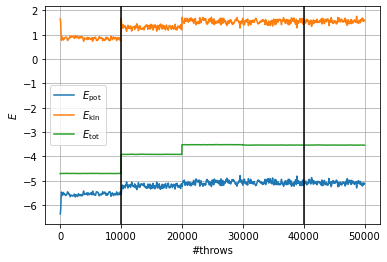

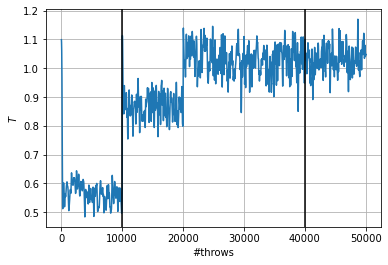

In [4]:
x = np.arange(N_start + N_equilibration + N_measure) * 10
y = np.loadtxt("data/4.1-measures.dat")
plt.plot(x, y[:, 0], label="$E_\mathrm{pot}$")
plt.plot(x, y[:, 1], label="$E_\mathrm{kin}$")
plt.plot(x, y[:, 3], label="$E_\mathrm{tot}$")
plt.axvline(N_start * 10, color="black")
plt.axvline((N_start + N_equilibration) * 10, color="black")
plt.legend()
plt.xlabel(r"#throws")
plt.ylabel(r"$E$")
plt.grid(True)
plt.show()

plt.plot(x, y[:, 2])
plt.axvline(N_start * 10, color="black")
plt.axvline((N_start + N_equilibration) * 10, color="black")
plt.grid(True)
plt.xlabel(r"#throws")
plt.ylabel(r"$T$");

The total energy becomes stable after the equilibration phase.

## Exercise 4.2

In [5]:
# Read parameters from info file
with open("data/4.2-info.dat") as file:
    N_start = int(file.readline())
    N_equilibration = int(file.readline())
    N_measure = int(file.readline())
    N_steps_per_block = int(file.readline())

# Read data
data = np.loadtxt("data/4.2-measures.dat")
averages = np.loadtxt("data/4.2-averages.dat")

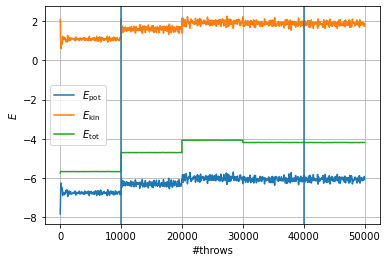

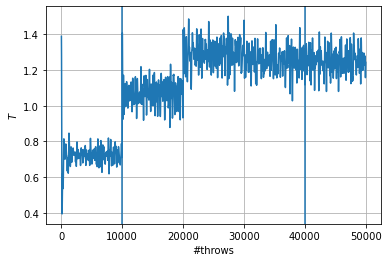

In [6]:
x = np.arange(N_start + N_equilibration + N_measure) * 10

plt.plot(x, data[:, 0], label="$E_\mathrm{pot}$")
plt.plot(x, data[:, 1], label="$E_\mathrm{kin}$")
plt.plot(x, data[:, 3], label="$E_\mathrm{tot}$")
plt.axvline(N_start * 10)
plt.axvline((N_start + N_equilibration) * 10)
plt.legend()
plt.xlabel(r"#throws")
plt.ylabel(r"$E$")
plt.grid(True)
plt.show()

plt.plot(x, data[:, 2])
plt.axvline(N_start * 10)
plt.axvline((N_start + N_equilibration) * 10)
plt.grid(True)
plt.xlabel(r"#throws")
plt.ylabel(r"$T$");

E_pot = -6.069e+00 ± 7e-03


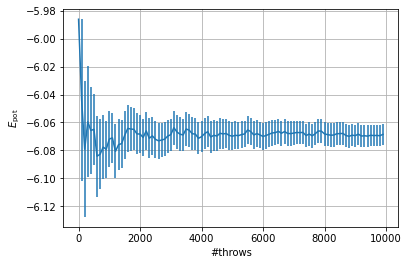

E_kin = 1.877e+00 ± 7e-03


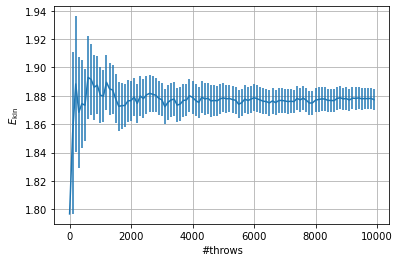

E_tot = -4.191e+00 ± 2e-04


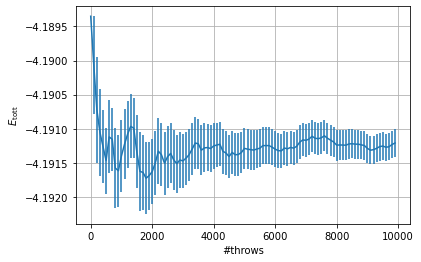

T = 1.252e+00 ± 5e-03


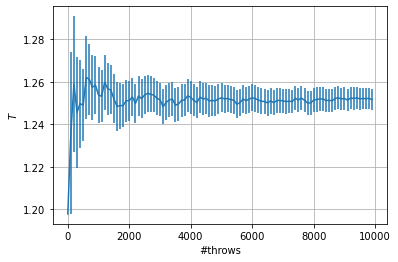

In [7]:
x = np.arange(N_measure * 10 / N_steps_per_block) * N_steps_per_block
epot = blocks_value(averages[:, 0])
ekin = blocks_value(averages[:, 1])
temp = blocks_value(averages[:, 2])
etot = blocks_value(averages[:, 3])

print(f"E_pot = {epot[-1,0]:.3e} ± {epot[-1,1]:.0e}")
plt.errorbar(x, epot[:,0], yerr=epot[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$E_\mathrm{pot}$")
plt.grid(True)
plt.show()

print(f"E_kin = {ekin[-1,0]:.3e} ± {ekin[-1,1]:.0e}")
plt.errorbar(x[:100], ekin[:100,0], yerr=ekin[:100,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$E_\mathrm{kin}$")
plt.grid(True)
plt.show()

print(f"E_tot = {etot[-1,0]:.3e} ± {etot[-1,1]:.0e}")
plt.errorbar(x, etot[:,0], yerr=etot[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$E_\mathrm{tott}$")
plt.grid(True)
plt.show()

print(f"T = {temp[-1,0]:.3e} ± {temp[-1,1]:.0e}")
plt.errorbar(x, temp[:,0], yerr=temp[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$T$")
plt.grid(True)
plt.show()

## Exercise 4.3

In [8]:
# Read parameters from info file
with open("data/4.3-info.dat") as file:
    N_start = int(file.readline())
    N_equilibration = int(file.readline())
    N_measure = int(file.readline())
    N_steps_per_block = int(file.readline())
    
epsilonk = 120.
epsilon = epsilonk * scipy.constants.k

### Solid

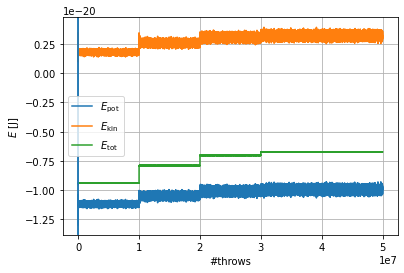

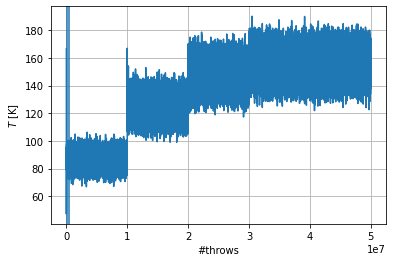

In [10]:
data = np.loadtxt("data/4.3-measures-solid.dat")
x = np.arange((N_start + N_equilibration + N_measure)*100) * 100

plt.plot(x, data[:, 0] * epsilon, label="$E_\mathrm{pot}$")
plt.plot(x, data[:, 1] * epsilon, label="$E_\mathrm{kin}$")
plt.plot(x, data[:, 3] * epsilon, label="$E_\mathrm{tot}$")
plt.axvline(N_start * 10)
plt.axvline((N_start + N_equilibration) * 10)
plt.legend(loc="center left")
plt.xlabel(r"#throws")
plt.ylabel(r"$E~\mathrm{[J]}$")
plt.grid(True)
plt.show()

plt.plot(x, data[:, 2] * epsilonk)
plt.axvline(N_start * 100)
plt.axvline((N_start + N_equilibration) * 100)
plt.grid(True)
plt.xlabel(r"#throws")
plt.ylabel(r"$T~\mathrm{[K]}$");

E_pot = -9.962e-21 ± 5e-25 J


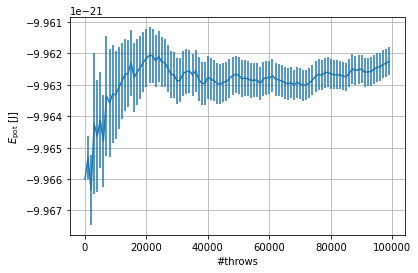

E_kin = 3.220e-21 ± 5e-25 J


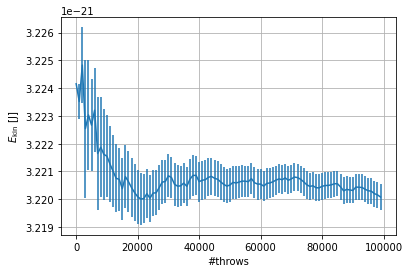

E_tot = -6.742e-21 ± 6e-26 J


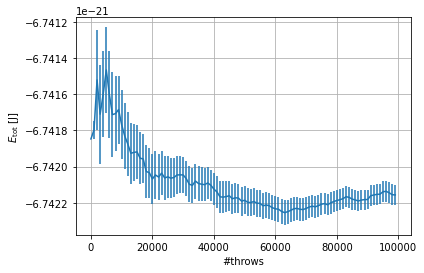

T = 1.555e+02 ± 2e-02 K


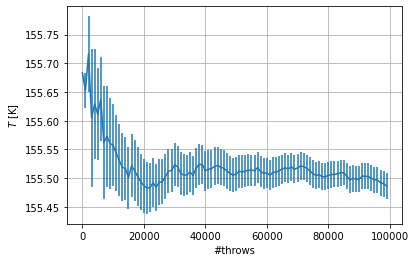

In [11]:
averages = np.loadtxt("data/4.3-averages-solid.dat")
N_steps_per_block = 1000
x = np.arange(N_measure * 100 / N_steps_per_block) * N_steps_per_block
epot = blocks_value(averages[:, 0]) * epsilon
ekin = blocks_value(averages[:, 1]) * epsilon
temp = blocks_value(averages[:, 2]) * epsilonk
etot = blocks_value(averages[:, 3]) * epsilon

print(f"E_pot = {epot[-1,0]:.3e} ± {epot[-1,1]:.0e} J")
plt.errorbar(x, epot[:,0], yerr=epot[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$E_\mathrm{pot}~\mathrm{[J]}$")
plt.grid(True)
plt.show()

print(f"E_kin = {ekin[-1,0]:.3e} ± {ekin[-1,1]:.0e} J")
plt.errorbar(x, ekin[:,0], yerr=ekin[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$E_\mathrm{kin}~\mathrm{[J]}$")
plt.grid(True)
plt.show()

print(f"E_tot = {etot[-1,0]:.3e} ± {etot[-1,1]:.0e} J")
plt.errorbar(x, etot[:,0], yerr=etot[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$E_\mathrm{tot}~\mathrm{[J]}$")
plt.grid(True)
plt.show()

print(f"T = {temp[-1,0]:.3e} ± {temp[-1,1]:.0e} K")
plt.errorbar(x, temp[:,0], yerr=temp[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$T~\mathrm{[K]}$")
plt.grid(True)
plt.show()

### Liquid

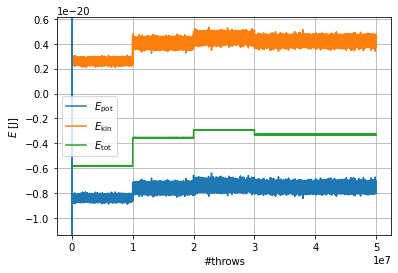

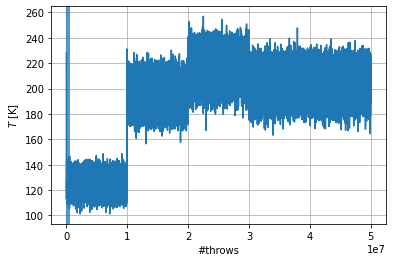

In [12]:
data = np.loadtxt("data/4.3-measures-liquid.dat")
x = np.arange((N_start + N_equilibration + N_measure)*100) * 100

plt.plot(x, data[:, 0] * epsilon, label="$E_\mathrm{pot}$")
plt.plot(x, data[:, 1] * epsilon, label="$E_\mathrm{kin}$")
plt.plot(x, data[:, 3] * epsilon, label="$E_\mathrm{tot}$")
plt.axvline(N_start * 10)
plt.axvline((N_start + N_equilibration) * 10)
plt.legend(loc="center left")
plt.xlabel(r"#throws")
plt.ylabel(r"$E~\mathrm{[J]}$")
plt.grid(True)
plt.show()

plt.plot(x, data[:, 2] * epsilonk)
plt.axvline(N_start * 100)
plt.axvline((N_start + N_equilibration) * 100)
plt.grid(True)
plt.xlabel(r"#throws")
plt.ylabel(r"$T~\mathrm{[K]}$");

E_pot = -7.521e-21 ± 2e-24 J


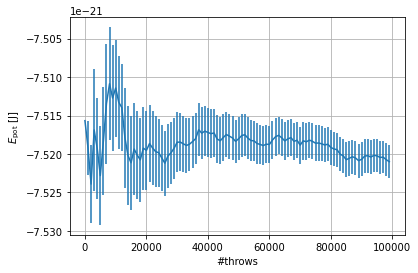

E_kin = 4.229e-21 ± 2e-24 J


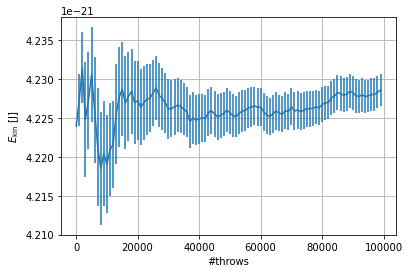

E_tot = -3.292e-21 ± 9e-26 J


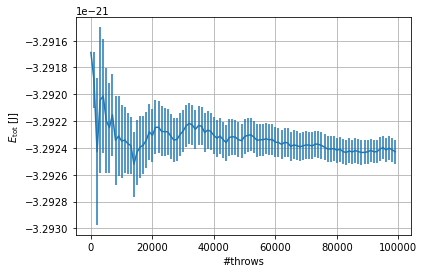

T = 2.042e+02 ± 1e-01 K


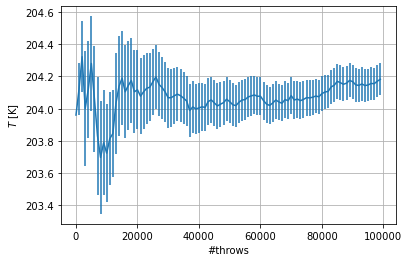

In [13]:
averages = np.loadtxt("data/4.3-averages-liquid.dat")
N_steps_per_block = 1000
x = np.arange(N_measure * 100 / N_steps_per_block) * N_steps_per_block
epot = blocks_value(averages[:, 0]) * epsilon
ekin = blocks_value(averages[:, 1]) * epsilon
temp = blocks_value(averages[:, 2]) * epsilonk
etot = blocks_value(averages[:, 3]) * epsilon

print(f"E_pot = {epot[-1,0]:.3e} ± {epot[-1,1]:.0e} J")
plt.errorbar(x, epot[:,0], yerr=epot[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$E_\mathrm{pot}~\mathrm{[J]}$")
plt.grid(True)
plt.show()

print(f"E_kin = {ekin[-1,0]:.3e} ± {ekin[-1,1]:.0e} J")
plt.errorbar(x, ekin[:,0], yerr=ekin[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$E_\mathrm{kin}~\mathrm{[J]}$")
plt.grid(True)
plt.show()

print(f"E_tot = {etot[-1,0]:.3e} ± {etot[-1,1]:.0e} J")
plt.errorbar(x, etot[:,0], yerr=etot[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$E_\mathrm{tot}~\mathrm{[J]}$")
plt.grid(True)
plt.show()

print(f"T = {temp[-1,0]:.3e} ± {temp[-1,1]:.0e} K")
plt.errorbar(x, temp[:,0], yerr=temp[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$T~\mathrm{[K]}$")
plt.grid(True)
plt.show()

### Gas

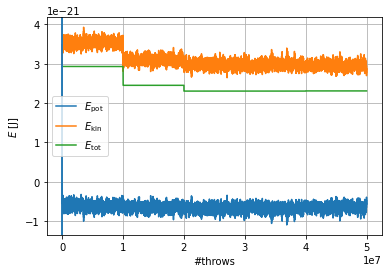

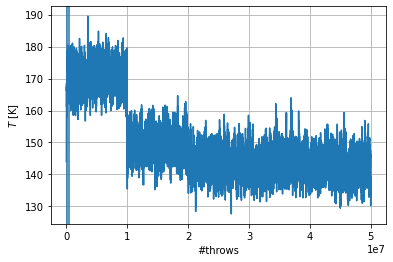

In [14]:
data = np.loadtxt("data/4.3-measures-gas.dat")
x = np.arange((N_start + N_equilibration + N_measure)*100) * 100

plt.plot(x, data[:, 0] * epsilon, label="$E_\mathrm{pot}$")
plt.plot(x, data[:, 1] * epsilon, label="$E_\mathrm{kin}$")
plt.plot(x, data[:, 3] * epsilon, label="$E_\mathrm{tot}$")
plt.axvline(N_start * 10)
plt.axvline((N_start + N_equilibration) * 10)
plt.legend(loc="center left")
plt.xlabel(r"#throws")
plt.ylabel(r"$E~\mathrm{[J]}$")
plt.grid(True)
plt.show()

plt.plot(x, data[:, 2] * epsilonk)
plt.axvline(N_start * 100)
plt.axvline((N_start + N_equilibration) * 100)
plt.grid(True)
plt.xlabel(r"#throws")
plt.ylabel(r"$T~\mathrm{[K]}$");

E_pot = -6.584e-22 ± 4e-24 J


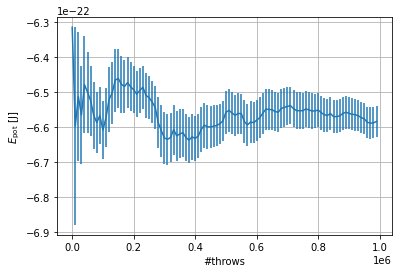

E_kin = 2.967e-21 ± 4e-24 J


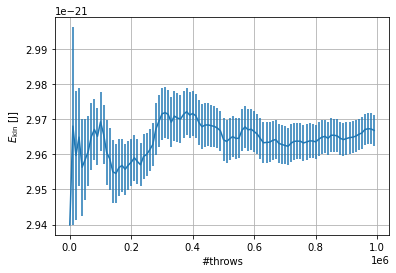

E_tot = 2.308e-21 ± 1e-26 J


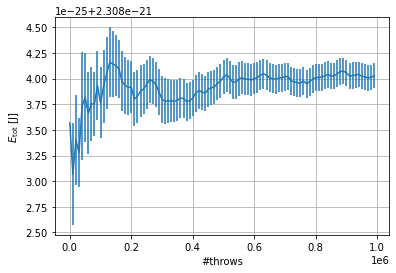

T = 1.433e+02 ± 2e-01 K


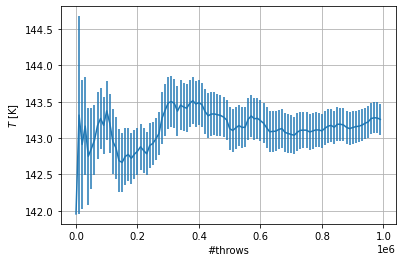

In [15]:
averages = np.loadtxt("data/4.3-averages-gas.dat")
N_steps_per_block = 10000
x = np.arange(N_measure * 1000 / N_steps_per_block) * N_steps_per_block
epot = blocks_value(averages[:, 0]) * epsilon
ekin = blocks_value(averages[:, 1]) * epsilon
temp = blocks_value(averages[:, 2]) * epsilonk
etot = blocks_value(averages[:, 3]) * epsilon

print(f"E_pot = {epot[-1,0]:.3e} ± {epot[-1,1]:.0e} J")
plt.errorbar(x, epot[:,0], yerr=epot[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$E_\mathrm{pot}~\mathrm{[J]}$")
plt.grid(True)
plt.show()

print(f"E_kin = {ekin[-1,0]:.3e} ± {ekin[-1,1]:.0e} J")
plt.errorbar(x, ekin[:,0], yerr=ekin[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$E_\mathrm{kin}~\mathrm{[J]}$")
plt.grid(True)
plt.show()

print(f"E_tot = {etot[-1,0]:.3e} ± {etot[-1,1]:.0e} J")
plt.errorbar(x, etot[:,0], yerr=etot[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$E_\mathrm{tot}~\mathrm{[J]}$")
plt.grid(True)
plt.show()

print(f"T = {temp[-1,0]:.3e} ± {temp[-1,1]:.0e} K")
plt.errorbar(x, temp[:,0], yerr=temp[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$T~\mathrm{[K]}$")
plt.grid(True)
plt.show()